# 数据可视化作业题目

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import random
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [13]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


C:\Users\Ultimator\AppData\Local\Temp\ipykernel_62968\1457509296.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_passengers=data.groupby(data['month']) ['passengers'].sum()


Text(0, 0.5, 'number')

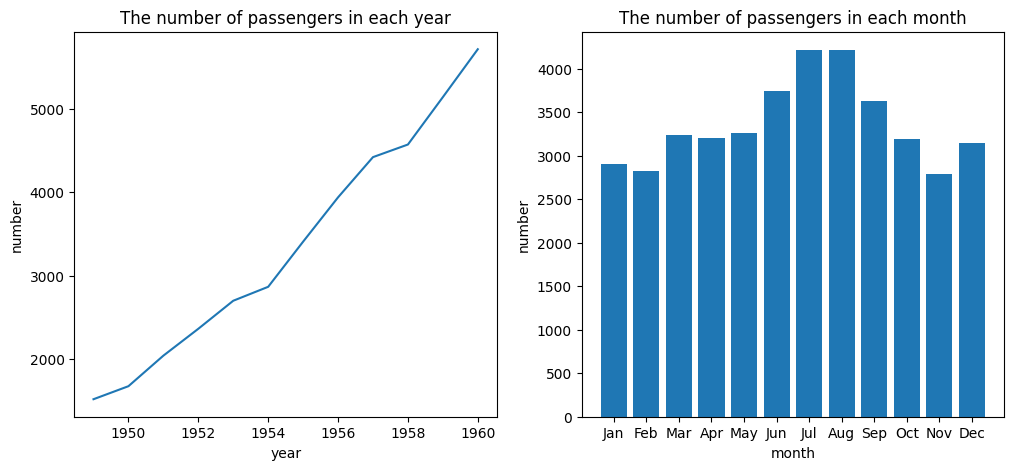

In [14]:
# 练习1-matplotlib
# 画两张图
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=False)
# 练习1-1
title = 'The number of passengers in each year'
x_label, y_label = 'year', 'number'
# 采用groupby函数对数据进行分组，之后再sum对passengers求和
year_passengers=data.groupby(data['year']) ['passengers'].sum()
# 画图，其中series数据的索引和值可以分别由index和values读取出
ax1.plot(year_passengers.index,year_passengers.values)  
ax1.set_title(title)
ax1.set_xlabel(x_label)
ax1.set_ylabel(y_label)

# 练习1-2
title = 'The number of passengers in each month'
x_label, y_label = 'month', 'number'
# 采用groupby函数对数据进行分组，之后再sum对passengers求和
month_passengers=data.groupby(data['month']) ['passengers'].sum()
# 画图，其中series数据的索引和值可以分别由index和values读取出
ax2.bar(month_passengers.index,month_passengers.values)  
ax2.set_title(title)
ax2.set_xlabel(x_label)
ax2.set_ylabel(y_label)

评论：
图左：每年的passengers数量稳中有进；
图右：每年Jul，Aug航班人数最多达到高峰，而在Dec与Jan会有个小峰，其余月份相对较少

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [23]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


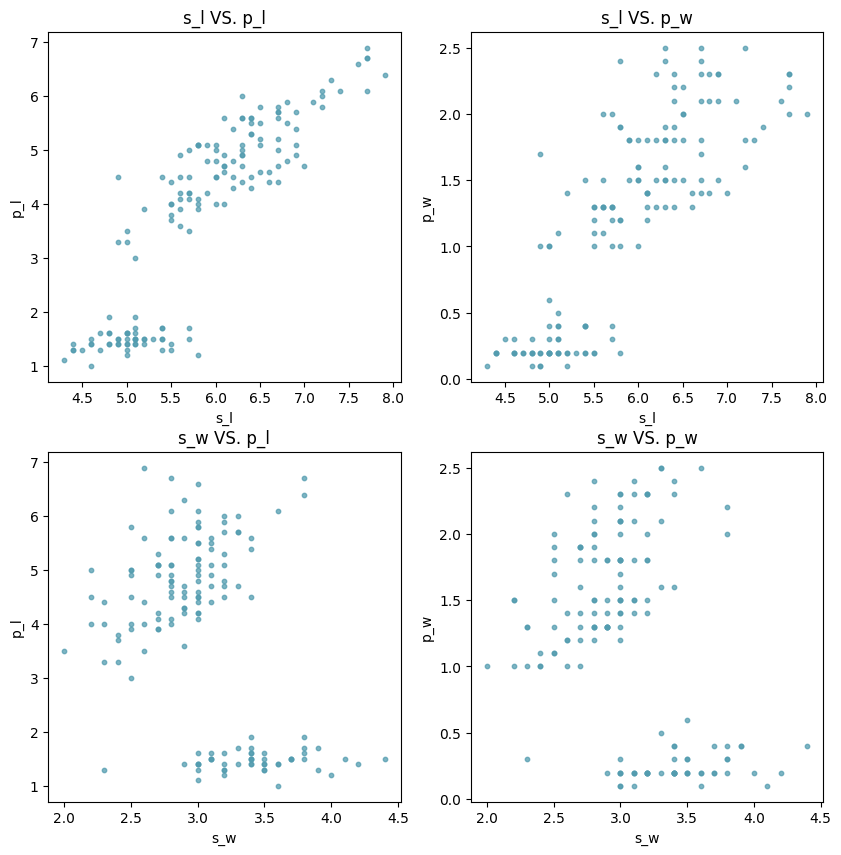

In [16]:
# 练习2-1
# 包装一个散点图的函数便于复用
def scatterplot(x_data, y_data, x_label, y_label, title, ax = None):

    # 创建一个绘图对象
    if ax:
        pass
    else:
        fig, ax = plt.subplots()
    # 调用plt句柄画一个图，返回两个变量fig，ax，分别是figure和 axes的缩写。函数返回一个figure图像和一个子图ax的array列表。
    # 一个fig图里边会套好几个ax，而每个ax会负责当前坐标上的图。所以任何绘制的图形都是在ax上完成的；
    # 而设置整个画布，将是在fig上完成。
    
    # 设置数据x_data和y_data、点的大小s、点的颜色color和透明度alpha
    ax.scatter(x_data, y_data, s = 10, color = '#539caf', alpha = 0.75)

    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# 画四张图
f, axs = plt.subplots(2, 2, figsize=(10, 10), sharey=False)
# 绘制散点图(0,0)
scatterplot(x_data = data['sepal_length']
            , y_data = data['petal_length']
            , x_label = 's_l'
            , y_label = 'p_l'
            , title = 's_l VS. p_l'
            , ax = axs[0, 0])
# 绘制散点图(0,1)
scatterplot(x_data = data['sepal_length']
            , y_data = data['petal_width']
            , x_label = 's_l'
            , y_label = 'p_w'
            , title = 's_l VS. p_w'
            , ax = axs[0, 1])
# 绘制散点图(1,0)
scatterplot(x_data = data['sepal_width']
            , y_data = data['petal_length']
            , x_label = 's_w'
            , y_label = 'p_l'
            , title = 's_w VS. p_l'
            , ax = axs[1, 0])
# 绘制散点图(1,1)
scatterplot(x_data = data['sepal_width']
            , y_data = data['petal_width']
            , x_label = 's_w'
            , y_label = 'p_w'
            , title = 's_w VS. p_w'
            , ax = axs[1, 1])

评论：
s_l 与 p_l 以及 s_l 与 p_w 具有较高的线性关系；
而下面两图相关性不大；

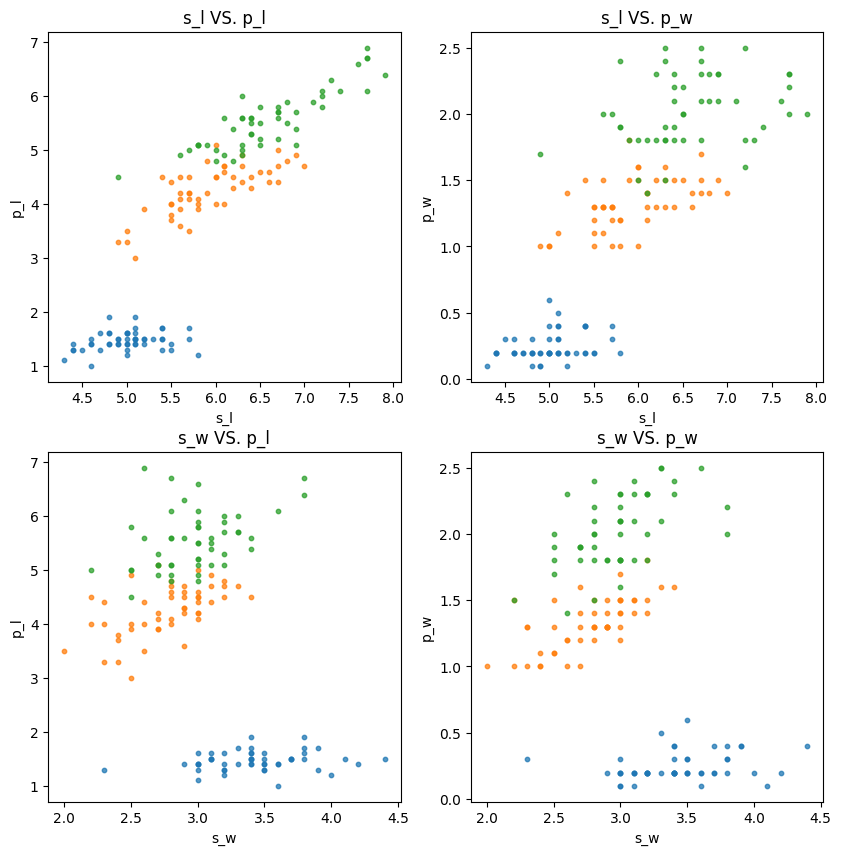

In [17]:
# 练习2-2
# 包装一个散点图的函数便于复用
# 增加的要求：同一张图中，会有不同的类，用颜色区分
# 那这里传参进来分类好的数据，x_data和y_data就只是要画的列了
def scatterplot_group(grouped_data, x_data, y_data, x_label, y_label, title, ax = None):

    # 创建一个绘图对象
    if ax:
        pass
    else:
        fig, ax = plt.subplots()
    # 调用plt句柄画一个图，返回两个变量fig，ax，分别是figure和 axes的缩写。函数返回一个figure图像和一个子图ax的array列表。
    # 一个fig图里边会套好几个ax，而每个ax会负责当前坐标上的图。所以任何绘制的图形都是在ax上完成的；
    # 而设置整个画布，将是在fig上完成。
    
    # 循环分类的数据：name是分的类，group是具体的数据
    # 设置数据x_data和y_data、点的大小s和透明度alpha
    for name, group in grouped_data:
        ax.scatter(group[x_data], group[y_data], label=name, s=10, alpha=0.75)

    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# 分一下类
species_data = data.groupby(data['species'])
# 画四张图
f, axs = plt.subplots(2, 2, figsize=(10, 10), sharey=False)
# 绘制散点图(0,0)
scatterplot_group(grouped_data = species_data
            , x_data = 'sepal_length'
            , y_data = 'petal_length'
            , x_label = 's_l'
            , y_label = 'p_l'
            , title = 's_l VS. p_l'
            , ax = axs[0, 0])
# 绘制散点图(0,1)
scatterplot_group(grouped_data = species_data
            , x_data = 'sepal_length'
            , y_data = 'petal_width'
            , x_label = 's_l'
            , y_label = 'p_w'
            , title = 's_l VS. p_w'
            , ax = axs[0, 1])
# 绘制散点图(1,0)
scatterplot_group(grouped_data = species_data
            , x_data = 'sepal_width'
            , y_data = 'petal_length'
            , x_label = 's_w'
            , y_label = 'p_l'
            , title = 's_w VS. p_l'
            , ax = axs[1, 0])
# 绘制散点图(1,1)
scatterplot_group(grouped_data = species_data
            , x_data = 'sepal_width'
            , y_data = 'petal_width'
            , x_label = 's_w'
            , y_label = 'p_w'
            , title = 's_w VS. p_w'
            , ax = axs[1, 1])

评论：
不做评论

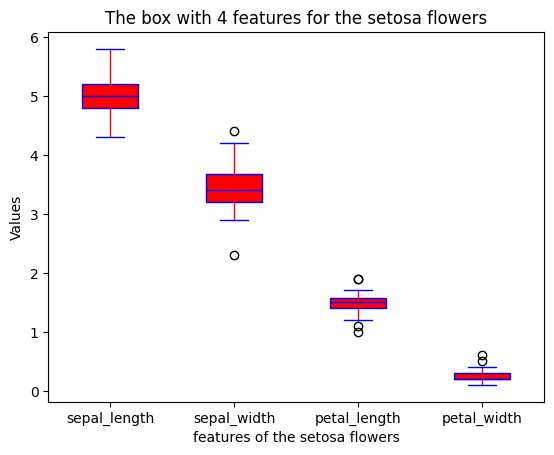

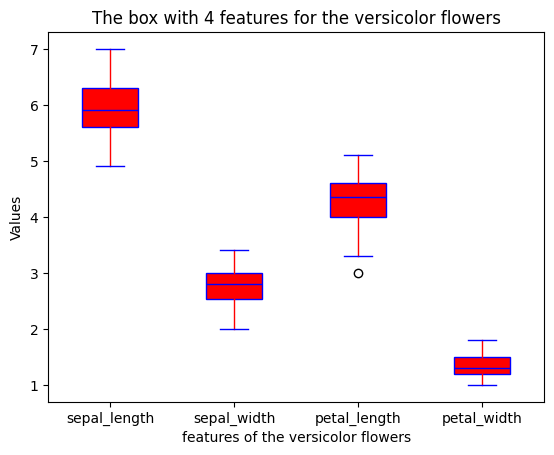

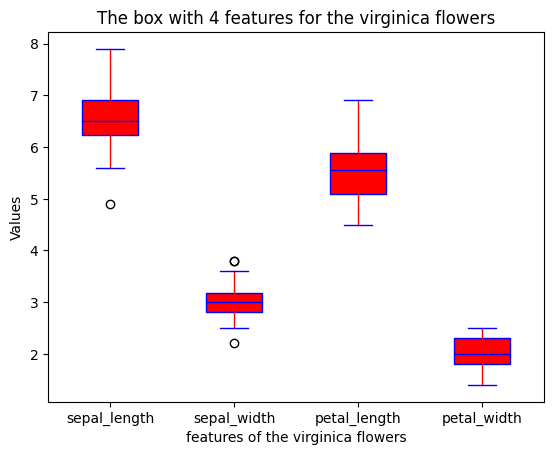

In [24]:
# 练习2-3
# 定义箱式图的函数
def boxplot(x_data, y_data, base_color, median_color, x_label, y_label, title):
    _, ax = plt.subplots()

    # 设置样式
    ax.boxplot(y_data
               # 箱子是否颜色填充
               , patch_artist = True
               # 中位数线颜色
               , medianprops = {'color': base_color}
               # 箱子颜色设置，color：边框颜色，facecolor：填充颜色
               , boxprops = {'color': base_color, 'facecolor': median_color}
               # 猫须颜色whisker
               , whiskerprops = {'color': median_color}
               # 猫须界限颜色whisker cap
               , capprops = {'color': base_color})

    # 箱图与x_data保持一致
    ax.set_xticklabels(x_data)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

# 分一下类
species_data = data.groupby(data['species'])
# 批量操作绘制箱式图
# 分了三类，遍历分类的数据绘制
for name, group in species_data:
        boxplot(x_data = group.columns[0:4]
                , y_data = group.values[:,0:4]
                , base_color = 'b'
                , median_color = 'r'
                , x_label = 'features of the ' + name + ' flowers'
                , y_label = 'Values'
                , title = 'The box with 4 features for the ' + name + ' flowers' )

评论：
不做评价

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [3]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


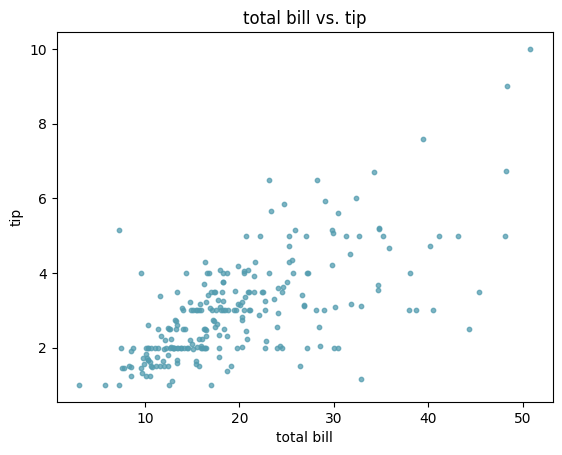

In [21]:
# 练习3-1
# 包装一个散点图的函数便于复用
def scatterplot(x_data, y_data, x_label, y_label, title, ax = None):

    # 创建一个绘图对象
    if ax:
        pass
    else:
        fig, ax = plt.subplots()
    # 调用plt句柄画一个图，返回两个变量fig，ax，分别是figure和 axes的缩写。函数返回一个figure图像和一个子图ax的array列表。
    # 一个fig图里边会套好几个ax，而每个ax会负责当前坐标上的图。所以任何绘制的图形都是在ax上完成的；
    # 而设置整个画布，将是在fig上完成。
    
    # 设置数据x_data和y_data、点的大小s、点的颜色color和透明度alpha
    ax.scatter(x_data, y_data, s = 10, color = '#539caf', alpha = 0.75)

    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# 绘制散点图
scatterplot(x_data = data['total_bill']
            , y_data = data['tip']
            , x_label = 'total bill'
            , y_label = 'tip'
            , title = 'total bill vs. tip')

评价：
小费和总小费之间存在较高线性关系

In [26]:
# 练习3-(2-6)
# 定义箱式图的函数
def boxplot(x_data, y_data, base_color, median_color, x_label, y_label, title):
    _, ax = plt.subplots()

    # 设置样式
    ax.boxplot(y_data
               # 箱子是否颜色填充
               , patch_artist = True
               # 中位数线颜色
               , medianprops = {'color': base_color}
               # 箱子颜色设置，color：边框颜色，facecolor：填充颜色
               , boxprops = {'color': base_color, 'facecolor': median_color}
               # 猫须颜色whisker
               , whiskerprops = {'color': median_color}
               # 猫须界限颜色whisker cap
               , capprops = {'color': base_color})

    # 箱图与x_data保持一致
    ax.set_xticklabels(x_data)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

C:\Users\Ultimator\AppData\Local\Temp\ipykernel_62968\1660109545.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(data[name])


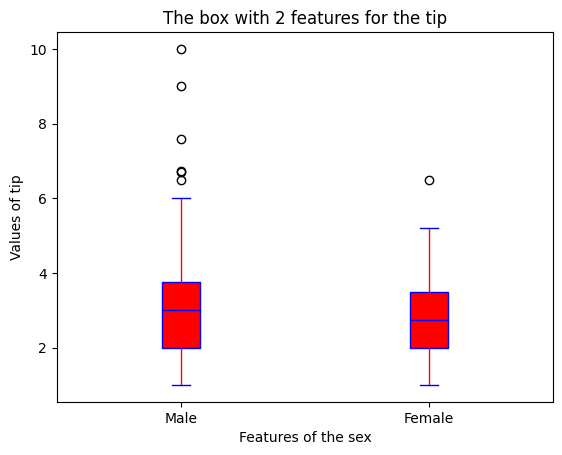

In [27]:
# 练习3-2
# 男性顾客和女性顾客，谁更慷慨
# 分一下类
name = 'sex'
grouped_data = data.groupby(data[name])
x_data = []
y_data = []
for index, group in grouped_data:
    x_data.append(index)
    y_data.append(group['tip'])

boxplot(x_data = x_data
        , y_data = y_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'Features of the ' + name
        , y_label = 'Values of tip'
        , title = 'The box with '+ str(grouped_data.ngroups) +' features for the tip' )

评论：
Male的小费分布的方差更大，慷慨程度差不多

C:\Users\Ultimator\AppData\Local\Temp\ipykernel_62968\2597696622.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(data[name])


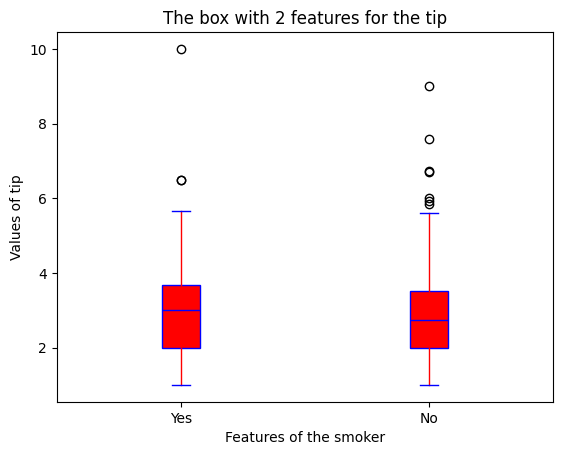

In [28]:
# 练习3-3
# 抽烟与否是否会对小费金额产生影响
# 分一下类
name = 'smoker'
grouped_data = data.groupby(data[name])
x_data = []
y_data = []
for index, group in grouped_data:
    x_data.append(index)
    y_data.append(group['tip'])

boxplot(x_data = x_data
        , y_data = y_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'Features of the ' + name
        , y_label = 'Values of tip'
        , title = 'The box with '+ str(grouped_data.ngroups) +' features for the tip' )

评论：
抽烟对于小费影响不大

C:\Users\Ultimator\AppData\Local\Temp\ipykernel_62968\2846653966.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(data[name])


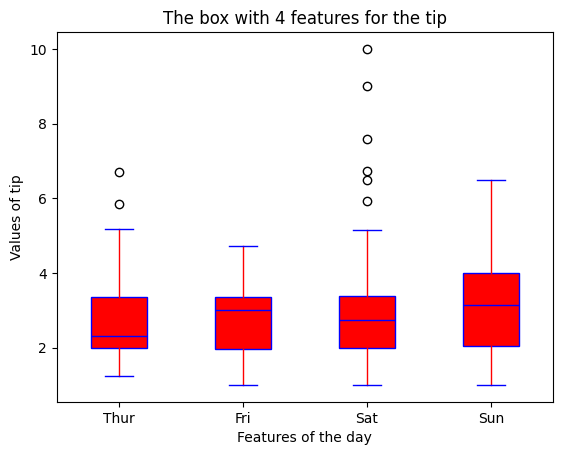

In [29]:
# 练习3-4
# 工作日和周末，什么时候顾客给的小费更慷慨
# 分一下类
name = 'day'
grouped_data = data.groupby(data[name])
x_data = []
y_data = []
for index, group in grouped_data:
    x_data.append(index)
    y_data.append(group['tip'])

boxplot(x_data = x_data
        , y_data = y_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'Features of the ' + name
        , y_label = 'Values of tip'
        , title = 'The box with '+ str(grouped_data.ngroups) +' features for the tip' )

评论：
从图中可以看到到周末的小费上限会高一些，总体来说分布偏差不多。可能Fri和Sun中位数水平要比Thur和Sat稍高

C:\Users\Ultimator\AppData\Local\Temp\ipykernel_62968\1868162929.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(data[name])


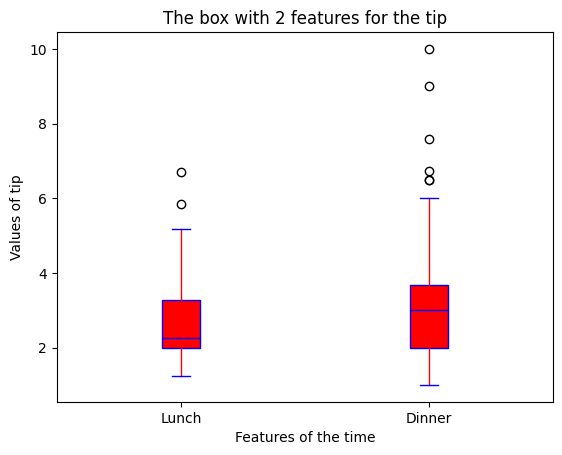

In [30]:
# 练习3-5
# 午饭和晚饭，哪一顿顾客更愿意给小费
# 分一下类
name = 'time'
grouped_data = data.groupby(data[name])
x_data = []
y_data = []
for index, group in grouped_data:
    x_data.append(index)
    y_data.append(group['tip'])

boxplot(x_data = x_data
        , y_data = y_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'Features of the ' + name
        , y_label = 'Values of tip'
        , title = 'The box with '+ str(grouped_data.ngroups) +' features for the tip' )

评价：
在Dinner时间段的小费较明显得会多于Lunch时间段的小费

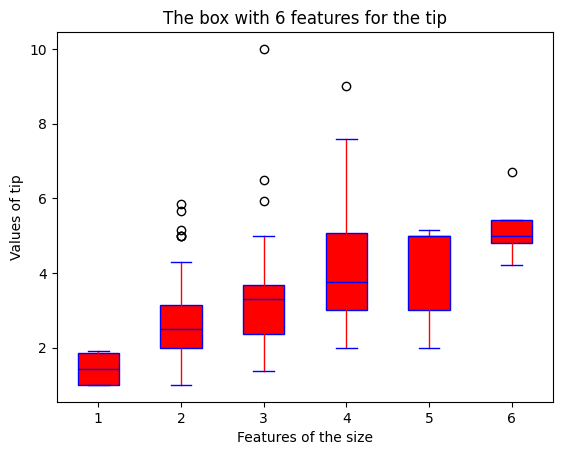

In [32]:
# 练习3-6
# 就餐人数是否会对慷慨度产生影响
# 分一下类
name = 'size'
grouped_data = data.groupby(data[name])
x_data = []
y_data = []
for index, group in grouped_data:
    x_data.append(index)
    y_data.append(group['tip'])

boxplot(x_data = x_data
        , y_data = y_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'Features of the ' + name
        , y_label = 'Values of tip'
        , title = 'The box with '+ str(grouped_data.ngroups) +' features for the tip' )

评论：
size显著与小费相关，size越大，小费越多

In [47]:
# 练习3-7
# 性别+抽烟的组合因素对慷慨度的影响
# 定义绘制分组柱状图的函数
def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 设置每一组柱状图的宽度
    total_width = 0.8
    # 设置每一个柱状图的宽度
    # 根据柱状图的数目len(y_data_list)，平分total_width
    ind_width = total_width / len(y_data_list)
    # 计算每一个柱状图的中心偏移
    # 这里应该是确定柱状图左边界和右边界
    # 左边界在：-total_width/2+ind_width/2
    # 右边界在：total_width/2+ind_width/2
    # 每条柱子的宽度是ind_width
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)

    # 分别绘制每一个柱状图
    # 基本逻辑是：画len(y_data_list)次
    # 比如在画左边的柱子的时候
    # 在x轴的数据上面加上偏移量+ alteration[i]
    # 对应的y轴数据是y_data_list[i]
    # 如果x不是数据的话，还是先要把x轴转化为数字列表
    # 然后修改x轴的坐标轴
    x_data_value = list(range(1, len(x_data) + 1))
    for i in range(0, len(y_data_list)):
        # 横向散开绘制
        ax.bar(x_data_value + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    
    ax.set_xticks(x_data_value)
    ax.set_xticklabels(x_data)
    # 将ax图片的一些设置加上
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')

    # 总结一下所需要输入的x，y数据格式：
    # x轴就是单纯是第一种分类的index
    # [1,2,  ,i]
    # y轴是一个列表，对应的每个列表元素是第二中分类的index
    # [[类别1],[类别2],   ,[类别n]]

In [44]:
pivot_result = data.pivot_table(values='tip', index='sex', columns='smoker', aggfunc='mean')
# type(pivot_result)
pivot_result

smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


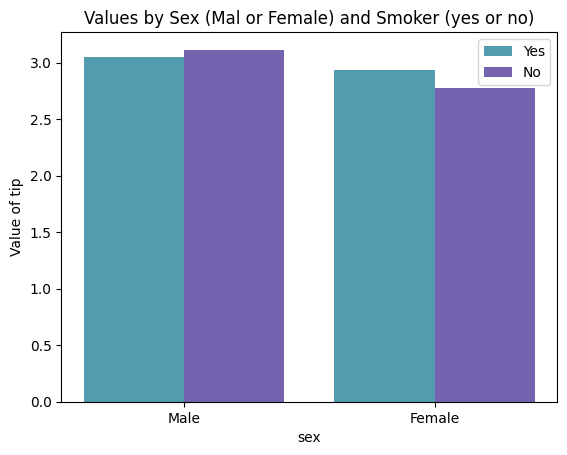

In [48]:
groupedbarplot(x_data = pivot_result.index.tolist()
               , y_data_list = [pivot_result[col].tolist() for col in pivot_result.columns]
               , y_data_names = ['Yes', 'No']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'sex'
               , y_label = 'Value of tip'
               , title = 'Values by Sex (Mal or Female) and Smoker (yes or no)')

评论：
从中可以看出，Male付的小费平均更多。Male抽烟的平均给的小费少于不抽烟给的小费，Female抽烟的平均给的小费大于不抽烟给的小费

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [46]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [86]:
def stackedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 循环绘制堆积柱状图
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            # 采用堆积的方式，除了第一个分类，后面的分类都从前一个分类的柱状图接着画
            # 用归一化保证最终累积结果为1，下面bottom参数表示纵向从哪里开始画
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right') # 设定图例位置

        survived  unsurvived  total  total  survived_prop  unsurvived_prop
pclass                                                                    
1            136          80    216    216       0.629630         0.370370
2             87          97    184    184       0.472826         0.527174
3            119         372    491    491       0.242363         0.757637


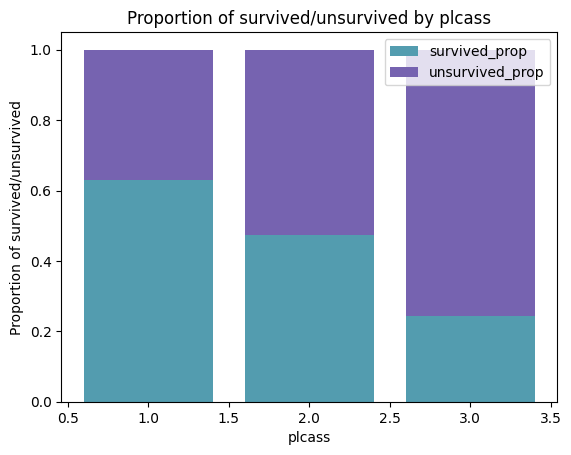

In [87]:
# 练习4-1
# 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
# 计算存活和非存活比例
result = data.groupby('pclass')['survived'].agg(['sum', 'count'])
result['unsurvived'] = result['count'] - result['sum']
result['total'] = result['sum'] + result['unsurvived']
result['survived_prop'] = result['sum'] / result['total']
result['unsurvived_prop'] = result['unsurvived'] / result['total']
# 重新组织结果
result = result.rename(columns={'sum': 'survived', 'count': 'total'})[['survived', 'unsurvived', 'total', 'survived_prop', 'unsurvived_prop']]
print(result)

name1 = 'plcass'
name2 = ['survived_prop', 'unsurvived_prop']
stackedbarplot(x_data = result.index.values
               , y_data_list = [result[name2[0]], result[name2[1]]]
               , y_data_names = [name2[0], name2[1]]
               , colors = ['#539caf', '#7663b0']
               , x_label = name1
               , y_label = 'Proportion of survived/unsurvived'
               , title = 'Proportion of survived/unsurvived by ' + name1)

注：原文档中的total有点怪,导致结果也有问题

        survived  unsurvived  total  total  survived_prop  unsurvived_prop
sex                                                                       
female       233          81    314    314       0.742038         0.257962
male         109         468    577    577       0.188908         0.811092


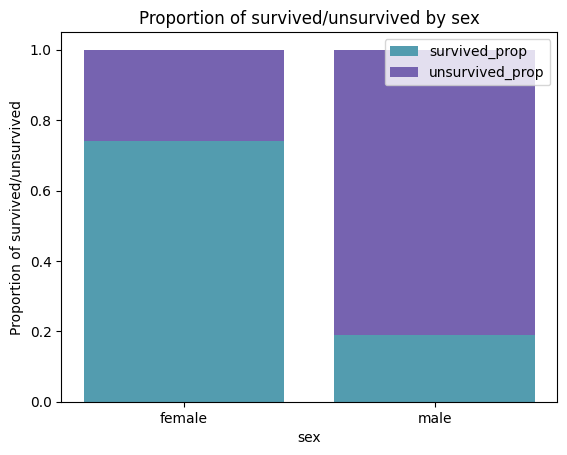

In [88]:
# 练习4-2
# 不同性别的幸存比例（提示：箱图或者提琴图）
# 计算存活和非存活比例
result = data.groupby('sex')['survived'].agg(['sum', 'count'])
result['unsurvived'] = result['count'] - result['sum']
result['total'] = result['sum'] + result['unsurvived']
result['survived_prop'] = result['sum'] / result['total']
result['unsurvived_prop'] = result['unsurvived'] / result['total']
# 重新组织结果
result = result.rename(columns={'sum': 'survived', 'count': 'total'})[['survived', 'unsurvived', 'total', 'survived_prop', 'unsurvived_prop']]
print(result)

name1 = 'sex'
name2 = ['survived_prop', 'unsurvived_prop']
stackedbarplot(x_data = result.index.values
               , y_data_list = [result[name2[0]], result[name2[1]]]
               , y_data_names = [name2[0], name2[1]]
               , colors = ['#539caf', '#7663b0']
               , x_label = name1
               , y_label = 'Proportion of survived/unsurvived'
               , title = 'Proportion of survived/unsurvived by ' + name1)

In [67]:
# 练习4-(3, 4, 6, 7)
# 定义箱式图的函数
def boxplot(x_data, y_data, base_color, median_color, x_label, y_label, title):
    _, ax = plt.subplots()

    # 设置样式
    ax.boxplot(y_data
               # 箱子是否颜色填充
               , patch_artist = True
               # 中位数线颜色
               , medianprops = {'color': base_color}
               # 箱子颜色设置，color：边框颜色，facecolor：填充颜色
               , boxprops = {'color': base_color, 'facecolor': median_color}
               # 猫须颜色whisker
               , whiskerprops = {'color': median_color}
               # 猫须界限颜色whisker cap
               , capprops = {'color': base_color})

    # 箱图与x_data保持一致
    ax.set_xticklabels(x_data)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

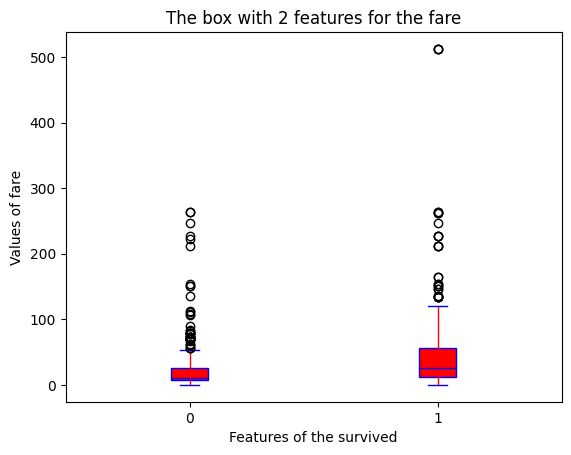

In [60]:
# 练习4-3
# 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
# 分一下类
name1 = 'survived'
name2 = 'fare'
grouped_data = data.groupby(data[name1])
x_data = []
y_data = []
for index, group in grouped_data:
    x_data.append(index)
    y_data.append(group[name2])

boxplot(x_data = x_data
        , y_data = y_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'Features of the ' + name1
        , y_label = 'Values of ' + name2
        , title = 'The box with '+ str(grouped_data.ngroups) +' features for the ' + name2)

In [76]:
# data.info()
data['age'].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: age, Length: 714, dtype: float64

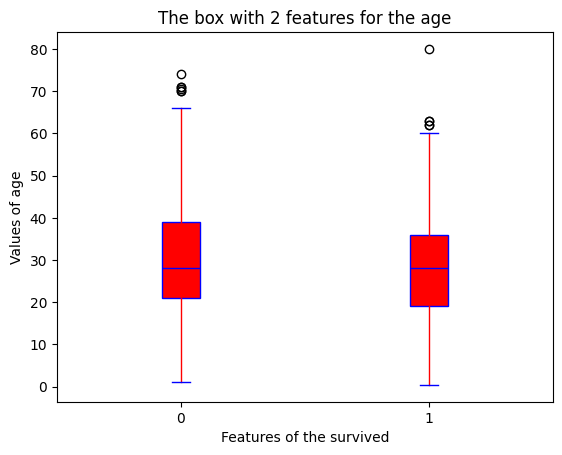

In [82]:
# 练习4-4
# 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
# 分一下类
name1 = 'survived'
name2 = 'age'
grouped_data = data.groupby(data[name1])
x_data = []
y_data = []
for index, group in grouped_data:
    x_data.append(index)
    y_data.append(group[name2].dropna())
    # 注意，年龄中有NaN的数据需要dropna()掉

boxplot(x_data = x_data
        , y_data = y_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'Features of the ' + name1
        , y_label = 'Values of ' + name2
        , title = 'The box with '+ str(grouped_data.ngroups) +' features for the ' + name2)

In [51]:
# 练习4-5
# 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 设置每一组柱状图的宽度
    total_width = 0.9
    ind_width = total_width / len(y_data_list)
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)

    x_data_value = list(range(1, len(x_data) + 1))
    for i in range(0, len(y_data_list)):
        # 横向散开绘制
        ax.bar(x_data_value + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    
    ax.set_xticks(x_data_value)
    ax.set_xticklabels(x_data)
    # 将ax图片的一些设置加上
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    # 就改一下legend位置
    ax.legend(loc = 'upper left')


pivot_result = data.pivot_table(index='embarked', columns='pclass', aggfunc='size', fill_value=0)
pivot_result

pclass,1,2,3
embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


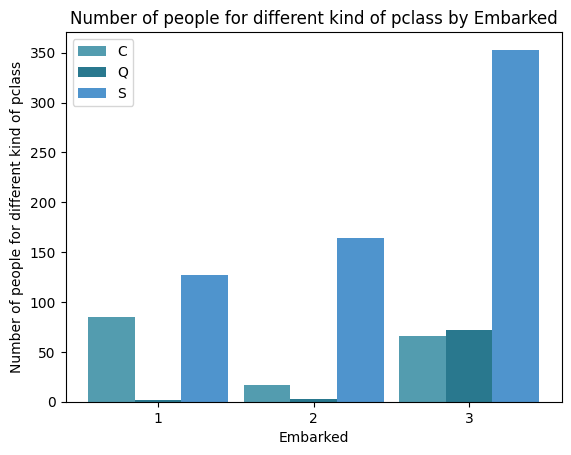

In [52]:
groupedbarplot(x_data = pivot_result.columns.tolist()
               , y_data_list = [pivot_result.loc[index_em].tolist() for index_em in pivot_result.index]
               , y_data_names = pivot_result.index.tolist()
               , colors = ['#539caf', '#29788E', '#4F94CD']
               , x_label = 'Embarked'
               , y_label = 'Number of people for different kind of pclass'
               , title = 'Number of people for different kind of pclass by Embarked')

pclass      1    2    3
embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


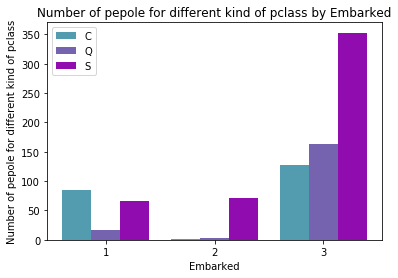

In [25]:
# 原来文章中的图

注：文档里这幅图有点问题，数据和图对不上。

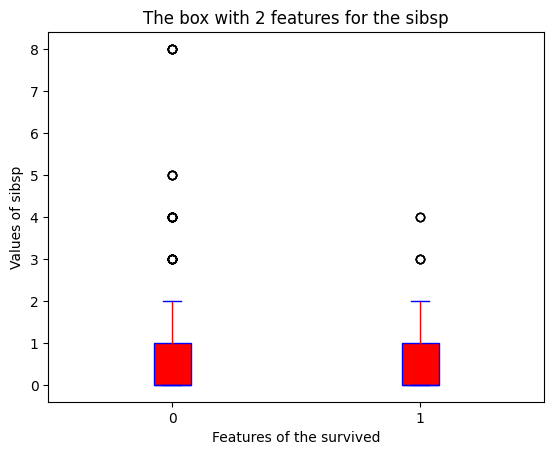

In [84]:
# 练习4-6
# 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
# 分一下类
name1 = 'survived'
name2 = 'sibsp'
grouped_data = data.groupby(data[name1])
x_data = []
y_data = []
for index, group in grouped_data:
    x_data.append(index)
    y_data.append(group[name2].dropna())
    # 注意，年龄中有NaN的数据需要dropna()掉

boxplot(x_data = x_data
        , y_data = y_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'Features of the ' + name1
        , y_label = 'Values of ' + name2
        , title = 'The box with '+ str(grouped_data.ngroups) +' features for the ' + name2)

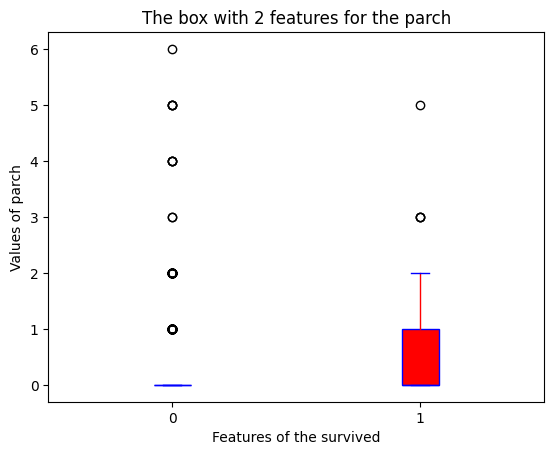

In [85]:
# 练习4-7
# 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
# 分一下类
name1 = 'survived'
name2 = 'parch'
grouped_data = data.groupby(data[name1])
x_data = []
y_data = []
for index, group in grouped_data:
    x_data.append(index)
    y_data.append(group[name2].dropna())
    # 注意，年龄中有NaN的数据需要dropna()掉

boxplot(x_data = x_data
        , y_data = y_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'Features of the ' + name1
        , y_label = 'Values of ' + name2
        , title = 'The box with '+ str(grouped_data.ngroups) +' features for the ' + name2)

In [54]:
# 练习4-8
# 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）
pivot_result = data.pivot_table(index='alone', columns='survived', aggfunc='size', fill_value=0)
pivot_result

survived,0,1
alone,,
False,175,179
True,374,163


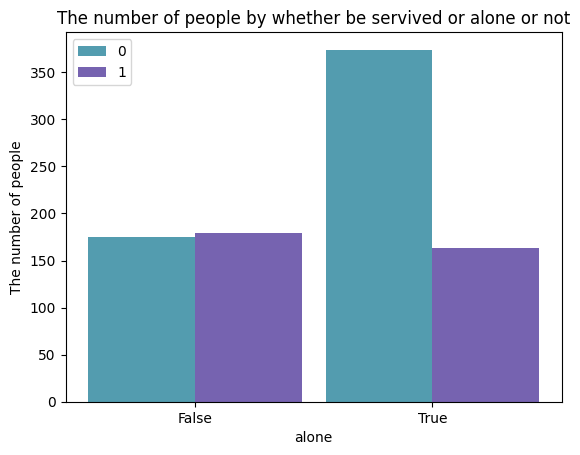

In [58]:
groupedbarplot(x_data = pivot_result.index.tolist()
               , y_data_list = [pivot_result.loc[:, col].tolist() for col in pivot_result.columns]
               , y_data_names = pivot_result.columns.tolist()
               , colors = ['#539caf', '#7663b0']
               , x_label = 'alone'
               , y_label = 'The number of people'
               , title = 'The number of people by whether be servived or alone or not')